In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# plt.style.use('ggplot')
sns.set_style('darkgrid', {'grid.background': 'blue'})

# statistics
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor

# split & metrics
from sklearn.model_selection import (
    cross_validate, cross_val_score,
    GridSearchCV, KFold, RandomizedSearchCV, 
    train_test_split, StratifiedKFold 
)
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    mean_absolute_percentage_error, make_scorer,
    root_mean_squared_error, PredictionErrorDisplay
)
from sklearn.metrics._scorer import _SCORERS

# preprocessing
# import smogn
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.preprocessing import (
    OneHotEncoder, KBinsDiscretizer, MinMaxScaler,
    OrdinalEncoder, RobustScaler, StandardScaler,
    PolynomialFeatures, 
)
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import RFE, RFECV

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from category_encoders import BinaryEncoder

# models
import shap
shap.initjs()

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import (
    LinearRegression, Lasso, Ridge,
    HuberRegressor, TheilSenRegressor,
    QuantileRegressor, RANSACRegressor
)

from sklearn.ensemble import (
    AdaBoostRegressor, GradientBoostingRegressor,
    VotingRegressor, RandomForestRegressor
)
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

# others
import re
import os
import sys
import time
import pickle
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# **Feature Information**

| Column                         | Description                                                                                  | Dtype   |
|--------------------------------|----------------------------------------------------------------------------------------------|---------|
| Customer                       | Unique identifier for each customer.                                                         | object  |
| State                          | The state where the customer resides.                                                        | object  |
| Customer Lifetime Value        | The predicted net profit attributed to the entire future relationship with a customer.       | float64 |
| Response                       | Indicates whether the customer responded to the marketing campaign.                          | object  |
| Coverage                       | Type of coverage purchased by the customer (e.g., Basic, Extended, Premium).                 | object  |
| Education                      | The highest level of education attained by the customer.                                     | object  |
| Effective To Date              | The date when the policy becomes effective.                                                  | object  |
| Employment Status              | The employment status of the customer (e.g., Employed, Unemployed).                          | object  |
| Gender                         | The gender of the customer.                                                                  | object  |
| Income                         | The annual income of the customer.                                                           | int64   |
| Location Code                  | The classification of the customer's location (e.g., Urban, Suburban, Rural).               | object  |
| Marital Status                 | The marital status of the customer.                                                          | object  |
| Monthly Premium Auto           | The monthly premium amount for the auto insurance.                                           | int64   |
| Months Since Last Claim        | The number of months since the customer last made a claim.                                   | int64   |
| Months Since Policy Inception  | The number of months since the customer started the policy.                                  | int64   |
| Number of Open Complaints      | The number of open complaints the customer has with the company.                             | int64   |
| Number of Policies             | The number of policies the customer has with the company.                                    | int64   |
| Policy Type                    | The type of policy the customer has (e.g., Corporate Auto, Personal Auto).                   | object  |
| Policy                         | The specific policy purchased by the customer.                                               | object  |
| Renew Offer Type               | The type of renewal offer provided to the customer.                                          | object  |
| Sales Channel                  | The channel through which the policy was sold (e.g., Agent, Call Center).                    | object  |
| Total Claim Amount             | The total amount claimed by the customer.                                                    | float64 |
| Vehicle Class                  | The class of the vehicle insured (e.g., Two-Door Car, Four-Door Car, SUV).                   | object  |
| Vehicle Size                   | The size of the vehicle insured (e.g., Small, Medsize, Large).                               | object  |


## **Display The Dataset**

In [164]:
df_auto_insurance = pd.read_csv('AutoInsurance.csv')
df_auto_insurance.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [165]:
# Showing the 8 columns who didnt showing above 
df_auto_insurance[['Effective To Date', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim']].head()

,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim
0,2/24/11,Employed,F,56274,Suburban,Married,69,32
1,1/31/11,Unemployed,F,0,Suburban,Single,94,13
2,2/19/11,Employed,F,48767,Suburban,Married,108,18
3,1/20/11,Unemployed,M,0,Suburban,Married,106,18
4,3/2/2011,Employed,M,43836,Rural,Single,73,12


In [166]:
df_auto_insurance.shape

(9134, 24)

In [167]:
df_auto_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### **Sparate data for training and test sets with target and real test set data without target**

In [168]:
df_stratified =df_auto_insurance.copy()

In [169]:
df_stratified['Effective To Date']= df_stratified['Effective To Date'].astype('datetime64[ns]')

In [172]:
# Features and target variable
X = df_stratified.drop(columns=['Customer Lifetime Value'])
y = df_stratified['Customer Lifetime Value']

# Split the data without stratification (since 'Customer Lifetime Value' is continuous)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Combine the training and test sets with the target variable
df_sparate = X_train
df_sparate['Customer Lifetime Value'] = y_train
df_sparate.to_csv('autoinsurance_train.csv', index=False)

test_data = X_test.copy()
test_data['Customer Lifetime Value'] = y_test

# Drop the target variable column from the test data
test_data = test_data.drop(columns=['Customer Lifetime Value'])

# Save the modified test set to a CSV file
test_data.to_csv('test_data_finpro.csv', index=False)

print("Test data saved to 'test_data_finpro.csv'")
print("Shape of the training data:", df_sparate.shape)
print("Shape of the real test set data:", test_data.shape)

Test data saved to 'test_data_finpro.csv'
Shape of the training data: (7307, 24)
Shape of the real test set data: (1827, 23)


## Purpose of Data Splitting and Saving

### **Why Split the Data?**
- **Objective:** Splitting the data into training and test sets is crucial for evaluating the performance of machine learning models. The training set is used to train the model, while the test set is reserved for assessing how well the model performs on unseen data. This helps to avoid overfitting and ensures that the model generalizes well to new, unseen data.

**Shapes of Data** :
- Training Data: (7307, 24) – Contains 7307 samples and 24 features (including the target variable).
- Test Data: (1827, 24) – Contains 1827 samples and 24 features (excluding the target variable).

---

# **Read New Data Train _'autoinsurance_train.csv'_**

In [173]:
df = pd.read_csv('autoinsurance_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       7307 non-null   object 
 1   State                          7307 non-null   object 
 2   Response                       7307 non-null   object 
 3   Coverage                       7307 non-null   object 
 4   Education                      7307 non-null   object 
 5   Effective To Date              7307 non-null   object 
 6   EmploymentStatus               7307 non-null   object 
 7   Gender                         7307 non-null   object 
 8   Income                         7307 non-null   int64  
 9   Location Code                  7307 non-null   object 
 10  Marital Status                 7307 non-null   object 
 11  Monthly Premium Auto           7307 non-null   int64  
 12  Months Since Last Claim        7307 non-null   i

In [187]:
df.shape

(7307, 24)

# **Missing Values Check**

In [174]:
# checking missing/Nan value with percentage
print('Missing values status:', df.isnull().values.any())
missing_values = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
missing_values['Percentage'] = (missing_values['Total Null Values'] / df.shape[0]) * 100
missing_values.sort_values(by='Percentage', ascending=False).reset_index()

Missing values status: False


,index,Total Null Values,Percentage
0,Customer,0,0.0
1,State,0,0.0
2,Vehicle Size,0,0.0
3,Vehicle Class,0,0.0
4,Total Claim Amount,0,0.0
5,Sales Channel,0,0.0
6,Renew Offer Type,0,0.0
7,Policy,0,0.0
8,Policy Type,0,0.0
9,Number of Policies,0,0.0


# **Duplicates Check**

In [175]:
# Check for duplicate rows
duplicates = df.duplicated()
# Print out the number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [176]:
duplicates = df.duplicated(keep='first')

# Print the duplicate rows
if duplicates.sum() > 0:
    print("Duplicate Rows:")
    print(df[duplicates])
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [177]:
# check the proportion of duplicates value

print(f'duplicated data\t\t: {df.duplicated().sum()}')
print(f'duplicated data (%)\t: {df.duplicated().sum() / len(df) * 100:.2f}%')

duplicated data		: 0
duplicated data (%)	: 0.00%


# **White Space and Puctuation**

In [178]:
# checking white space
def check_excessive_whitespace(value):
    if isinstance(value, str):
        return bool(re.search(r'\s{2,}', value))  # Mendeteksi 2 spasi atau lebih
    return False

# Proses deteksi spasi berlebih dan tampilkan informasi
whitespace_info = []
for column in df.columns:
    has_excessive_whitespace = df[column].apply(check_excessive_whitespace).any()
    whitespace_info.append({'Column': column, 'Has Excessive Whitespace': has_excessive_whitespace})

whitespace_df = pd.DataFrame(whitespace_info)
whitespace_df

,Column,Has Excessive Whitespace
0,Customer,False
1,State,False
2,Response,False
3,Coverage,False
4,Education,False
5,Effective To Date,False
6,EmploymentStatus,False
7,Gender,False
8,Income,False
9,Location Code,False


## **Checking Punctuation**

In [127]:
import string

In [179]:
def contains_punctuation(df):
    # This will filter and return unique entries containing any punctuation
    punctuations = string.punctuation
    return df[df.apply(lambda x: any(char in punctuations for char in str(x)))].unique()

In [180]:
text_cols = df.select_dtypes(include=['object']).columns

# Apply the function and display the results
for col in text_cols:
    if df[col].dtype == 'object':
        print(f'Punctuation in {col}:')
        print(contains_punctuation(df[col]))
        print('\n')

Punctuation in Customer:
[]


Punctuation in State:
[]


Punctuation in Response:
[]


Punctuation in Coverage:
[]


Punctuation in Education:
[]


Punctuation in Effective To Date:
['2011-01-29' '2011-02-26' '2011-01-24' '2011-04-02' '2011-05-02'
 '2011-01-26' '2011-01-18' '2011-03-02' '2011-01-22' '2011-11-01'
 '2011-01-15' '2011-02-19' '2011-07-01' '2011-01-14' '2011-02-17'
 '2011-02-01' '2011-01-31' '2011-02-22' '2011-01-19' '2011-01-16'
 '2011-08-01' '2011-10-01' '2011-04-01' '2011-01-21' '2011-02-14'
 '2011-01-30' '2011-06-01' '2011-06-02' '2011-02-27' '2011-12-02'
 '2011-01-20' '2011-02-21' '2011-09-01' '2011-01-13' '2011-02-13'
 '2011-02-24' '2011-02-20' '2011-01-27' '2011-01-17' '2011-08-02'
 '2011-01-01' '2011-01-02' '2011-02-25' '2011-07-02' '2011-02-16'
 '2011-11-02' '2011-01-28' '2011-02-18' '2011-02-15' '2011-03-01'
 '2011-05-01' '2011-09-02' '2011-01-23' '2011-02-02' '2011-12-01'
 '2011-02-23' '2011-01-25' '2011-10-02' '2011-02-28']


Punctuation in EmploymentStatus:
[]


Only Effective to Date column have **Punctuation**, let's check it!

In [181]:
# Ensure the column is treated as a string
df['Effective To Date'] = df['Effective To Date'].astype(str)

# Define the updated regex pattern
pattern = r'[^\w\s/-]'

# Find rows where the pattern is present
problematic_rows = df[df['Effective To Date'].str.contains(pattern, regex=True)]

# Print only the 'Effective To Date' column of problematic rows
print("Rows with unwanted characters in 'Effective To Date':")
print(problematic_rows[['Effective To Date']])

# Print a sample of the column to understand its content
print("Sample of 'Effective To Date' column:")
print(df['Effective To Date'].head(10))

Rows with unwanted characters in 'Effective To Date':
Empty DataFrame
Columns: [Effective To Date]
Index: []
Sample of 'Effective To Date' column:
0    2011-01-29
1    2011-02-26
2    2011-01-24
3    2011-04-02
4    2011-05-02
5    2011-01-26
6    2011-01-18
7    2011-03-02
8    2011-01-22
9    2011-02-26
Name: Effective To Date, dtype: object


In [131]:
df_auto_insurance['Effective To Date'].value_counts()

Effective To Date
10/1/2011    195
1/27/11      194
2/14/11      186
1/26/11      181
1/17/11      180
1/19/11      179
1/31/11      178
3/1/2011     178
1/20/11      173
2/26/11      169
1/28/11      169
2/19/11      168
5/1/2011     167
2/27/11      167
11/1/2011    166
4/2/2011     164
10/2/2011    161
2/28/11      161
2/1/2011     160
1/21/11      160
1/29/11      160
2/22/11      158
5/2/2011     158
3/2/2011     158
7/2/2011     157
12/2/2011    156
1/23/11      155
1/2/2011     154
1/18/11      154
1/15/11      153
1/14/11      152
11/2/2011    151
7/1/2011     151
1/25/11      151
2/25/11      149
8/1/2011     149
2/18/11      149
2/2/2011     149
1/1/2011     148
2/21/11      148
1/24/11      147
9/1/2011     146
1/30/11      145
1/13/11      145
6/2/2011     144
6/1/2011     143
2/23/11      143
1/16/11      142
2/16/11      139
2/13/11      139
2/24/11      139
9/2/2011     137
2/17/11      136
1/22/11      136
8/2/2011     134
2/20/11      132
2/15/11      130
12/1/2011    

The Puctuation **pattern** only have "/"

# **Exploratory Data Analysis**

## **Descriptive Statistic**

In [182]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,7307.0,37751.821267,30406.123202,0.000000,0.000000,34080.000000,62611.000000,99981.000000
Monthly Premium Auto,7307.0,93.302450,34.651864,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,7307.0,15.131381,10.096237,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,7307.0,48.020118,27.833325,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,7307.0,0.386616,0.916498,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,7307.0,2.950869,2.388074,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,7307.0,434.688713,291.799299,0.099007,270.269393,384.000000,547.200000,2893.239678
Customer Lifetime Value,7307.0,7995.099082,6880.861721,1898.007675,3945.980067,5739.823806,8988.409579,83325.381190


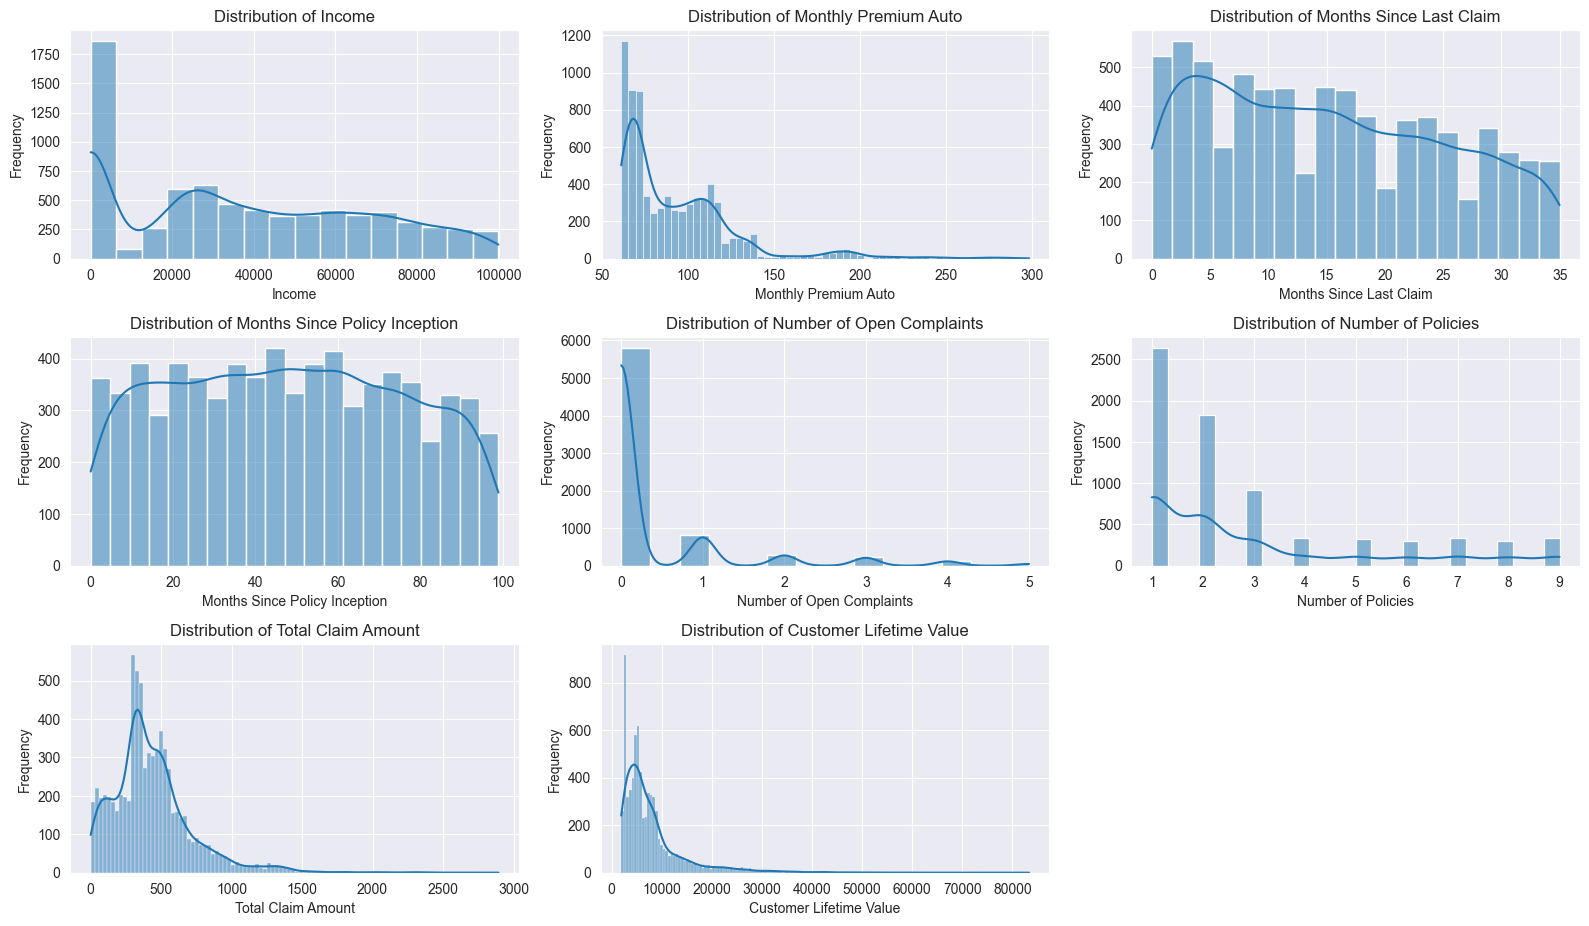

In [183]:
# Define the numeric columns to plot
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Plot histograms for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)  # Adjust subplot size based on the number of columns
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### **Insights:**

- **Customer Lifetime Value**: Shows substantial variability with a high mean and large standard deviation. This indicates a broad range of customer values, with some outliers significantly affecting the mean. The maximum value is quite high compared to the median.

- **Income**: The mean income is high, but the large standard deviation and the presence of many zero values suggest a skewed distribution. There may be a significant portion of the data with very low or zero income.

- **Monthly Premium Auto**: The mean and median values are relatively close, suggesting a less skewed distribution. However, the range of premiums is broad, with some policies costing significantly more than the average.

- **Months Since Last Claim**: The data shows a typical range of 6 to 35 months, with a mean close to the median. This suggests a fairly consistent pattern of claim frequency.

- **Months Since Policy Inception**: The dataset includes a wide range of policy ages, from newly started to nearly expired policies. This diversity can be useful for understanding different policyholder behaviors over time.

- **Number of Open Complaints**: Most records have zero open complaints, with a few outliers having up to 5 complaints. This indicates that most customers have either no complaints or very few.

- **Number of Policies**: The average number of policies per customer is just below 3, with some customers having up to 9 policies. This suggests a moderate level of policy ownership, with a few customers holding multiple policies.

- **Total Claim Amount**: The mean claim amount is substantial, but the high standard deviation and maximum value indicate that some claims are much higher than the average. This could be due to a few large claims skewing the results.

#### **Consistency Check:**
 The value for "Months Since Last Claim" should logically always be less than or equal to "Months Since Policy Inception." If "Months Since Last Claim" is greater, it would imply that a claim was made before the policy even started, which doesn't make sense.

In [184]:
# Identify and display rows where 'Months Since Last Claim' > 'Months Since Policy Inception'
inconsistent_rows = df[df['Months Since Last Claim'] > df['Months Since Policy Inception']]

# Display the first 2 rows with this inconsistency
inconsistent_rows.head(2)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
2,OZ47099,Arizona,No,Basic,Master,2011-01-24,Unemployed,M,0,Suburban,Married,71,17,6,0,1,Corporate Auto,Corporate L3,Offer4,Branch,340.800000,Four-Door Car,Medsize,2676.948677
3,KM52241,Arizona,No,Basic,High School or Below,2011-04-02,Unemployed,F,0,Rural,Married,74,20,3,0,2,Personal Auto,Personal L1,Offer1,Branch,47.502366,Four-Door Car,Medsize,8430.059143


### **Does It Make Sense?**
Logically, it does not make sense for Months Since Last Claim to be greater than Months Since Policy Inception. Since the policy must be active before a claim can be made, the number of months since the last claim should never exceed the number of months the policy has been in effect.

In [185]:
# Filter the rows where 'Months Since Last Claim' is greater than 'Months Since Policy Inception'
invalid_rows_count = df[df['Months Since Last Claim'] > df['Months Since Policy Inception']].shape[0]

# Display the count of such rows
print(f"Number of rows where 'Months Since Last Claim' > 'Months Since Policy Inception': {invalid_rows_count}")


Number of rows where 'Months Since Last Claim' > 'Months Since Policy Inception': 1195


Where Months Since Last Claim is greater than Months Since Policy Inception, this might indicate data entry errors or inconsistencies that need to be investigated.
**Lets investigated**

In [186]:
# Filter the rows where 'Months Since Last Claim' > 'Months Since Policy Inception' 
# and comparation between 'Number of Policies' < 0 and 'Number of Policies' > 1
filtered_rows_count_0 = df[(df['Months Since Last Claim'] > df['Months Since Policy Inception']) & 
                         (df['Number of Policies'] <= 1)].shape[0]
filtered_rows_count_1= df[(df['Months Since Last Claim'] > df['Months Since Policy Inception']) & 
                         (df['Number of Policies'] >= 2)].shape[0]
                         

# Display the count of such rows
print(f"Number of rows where 'Months Since Last Claim' > 'Months Since Policy Inception' and 'Number of Policies' <= 1 : {filtered_rows_count_0}")
print(f"Number of rows where 'Months Since Last Claim' > 'Months Since Policy Inception' and 'Number of Policies' > 1 : {filtered_rows_count_1}")

Number of rows where 'Months Since Last Claim' > 'Months Since Policy Inception' and 'Number of Policies' <= 1 : 429
Number of rows where 'Months Since Last Claim' > 'Months Since Policy Inception' and 'Number of Policies' > 1 : 766


## Inconsistent Data with Single Policy Holders

- **Observation:** There are 429 rows where `Months Since Last Claim` is greater than `Months Since Policy Inception` and the customer has `Number of Policies <= 1`.

- **Interpretation:** This is a significant red flag. Since a customer with only one policy should not have a claim that predates the inception of their policy, these 521 rows likely indicate data entry errors or inconsistencies. It's highly improbable that a claim could be recorded before the policy began, especially when the customer only has one policy.

- **Action:** These rows should be reviewed and corrected. The inconsistency suggests that either the `Months Since Last Claim` or `Months Since Policy Inception` was entered incorrectly.

---

## Customers with Multiple Policies

- **Observation:** There are 766 rows where `Months Since Last Claim` is greater than `Months Since Policy Inception` and the customer has `Number of Policies > 1`.

- **Interpretation:** In this case, the data might make more sense if we consider that customers with multiple policies could have had one policy for a long time and recently acquired another. The `Months Since Last Claim` could refer to a claim made under an earlier policy, while `Months Since Policy Inception` might refer to a newer policy. However, this still raises the question of why these dates are inconsistent, which might suggest overlapping or sequential policies.

- **Consideration:** This could point to a valid business scenario where customers hold multiple policies (possibly including non-auto policies), but it's essential to ensure that the dates are being tracked correctly. The system should be able to distinguish between claims related to different policies to avoid these inconsistencies.

---

## *Decision*

## Delete Inconsistency Rows

### Pros:
- Removing the 1195 inconsistent rows (429 with `Number of Policies <= 1` and 766 with `Number of Policies > 1`) cleans up the dataset and ensures that only logically consistent data is used for analysis.
- This approach retains the bulk of the dataset while addressing known issues, leading to more reliable insights and model performance.

### Cons:
- May lose 16.36% of the data, which might reduce the dataset's diversity and richness, potentially affecting model generalizability.
- There is a risk of discarding data that could have been corrected rather than deleted, which might be valuable in certain analyses.

---

### This approach allows to:

- **Maintain the Integrity of the Dataset:** By removing only the problematic rows, you preserve the integrity of the data and ensure that any analysis or modeling is based on logically consistent information.

- **Retain Valuable Features:** You keep the `Months Since Last Claim` column, which could be an important feature, especially in understanding customer behavior or predicting outcomes.

- **Minimize Data Loss:** Although i lose 16.36% of the data, this is a reasonable trade-off for ensuring the remaining data is reliable and valid for analysis.


In [190]:
df_1 =df[~(df['Months Since Last Claim'] > df['Months Since Policy Inception'])]

# Display the shape of the cleaned DataFrame to confirm the removal
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_1.shape}")

Original dataset shape: (7307, 24)
Cleaned dataset shape: (6112, 24)


## **Recap All Unique Data**

In [191]:
# List to hold information about each column
list_item = []

# Collect information for each column
for col in df_1.columns:
    list_item.append([
        col, 
        df_1[col].dtype, 
        df_1[col].isna().sum(), 
        (df_1[col].isna().sum() / len(df_1)) * 100,
        df_1[col].nunique(),
        df_1[col].unique()
    ])

# Create a DataFrame from the collected information
df_1_desc = pd.DataFrame(
    columns=['data_features', 'data_type', 'null', '%_null', 'unique', 'unique_sample'],
    data=list_item
)

# Adjust display settings to show all values
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the DataFrame
df_1_desc

,data_features,data_type,null,%_null,unique,unique_sample
0,Customer,object,0,0.0,6112,"[MP13698, ZF84449, WH11924, QH27767, YV40022, YQ11786, FW16824, TB56369, XR82418, AA30683, OY96856, YQ44187, JK53304, CT88432, KY33386, TR67616, XM11175, KL84615, FQ66351, WL72919, CL38124, UC83161, YO14199, WD85096, YA80645, IF87079, HU54636, ZG84862, HK84372, KH16079, PB43222, MM90239, ZB62469, TT20057, WZ56476, XR75319, XN11823, TA22923, UU70820, AP32891, SF30642, MH40017, FS29897, CF50291, OJ84485, RC74014, DX98298, QN15356, HU41273, KE45653, WF73839, GB71156, VF58561, UV46349, LH94176, II37804, WO30947, WE19034, IL91509, CT53265, IC22580, TL39050, JH14651, WV39838, GE26813, UI84849, KG23128, XH46220, FZ89300, BL13393, VN22337, HY25004, ID45268, LW91009, KU13616, OH80943, BJ58596, JB11283, DE23903, YC87263, CG36206, IJ36435, NE22677, HI74419, XY78443, KC14861, GN18675, PL28709, IN10489, KW93227, YF87007, HZ39407, IA31850, SP63623, RY26286, AM99192, WL65572, UV89069, TO14996, YE88490, ...]"
1,State,object,0,0.0,5,"[Oregon, Washington, California, Arizona, Nevada]"
2,Response,object,0,0.0,2,"[No, Yes]"
3,Coverage,object,0,0.0,3,"[Premium, Basic, Extended]"
4,Education,object,0,0.0,5,"[College, Doctor, High School or Below, Bachelor, Master]"
5,Effective To Date,object,0,0.0,59,"[2011-01-29, 2011-02-26, 2011-05-02, 2011-01-26, 2011-01-18, 2011-03-02, 2011-01-22, 2011-11-01, 2011-01-15, 2011-02-19, 2011-01-14, 2011-02-17, 2011-02-01, 2011-02-22, 2011-01-16, 2011-08-01, 2011-10-01, 2011-04-01, 2011-01-21, 2011-02-14, 2011-01-30, 2011-06-01, 2011-06-02, 2011-12-02, 2011-01-20, 2011-02-21, 2011-09-01, 2011-01-13, 2011-02-13, 2011-02-20, 2011-01-27, 2011-01-17, 2011-04-02, 2011-08-02, 2011-01-01, 2011-01-02, 2011-01-31, 2011-07-02, 2011-02-16, 2011-02-24, 2011-01-24, 2011-11-02, 2011-01-28, 2011-02-18, 2011-02-15, 2011-03-01, 2011-05-01, 2011-09-02, 2011-02-25, 2011-07-01, 2011-02-02, 2011-12-01, 2011-01-25, 2011-10-02, 2011-02-28, 2011-02-23, 2011-02-27, 2011-01-23, 2011-01-19]"
6,EmploymentStatus,object,0,0.0,5,"[Unemployed, Employed, Disabled, Medical Leave, Retired]"
7,Gender,object,0,0.0,2,"[F, M]"
8,Income,int64,0,0.0,3836,"[0, 82601, 32169, 72805, 36551, 86305, 71391, 26746, 97658, 58682, 30686, 33681, 48139, 83879, 60234, 30825, 27593, 33738, 48927, 41212, 73759, 34498, 59590, 45515, 92600, 40463, 27880, 49706, 29809, 12607, 57506, 95697, 49937, 59624, 82413, 38595, 39913, 31572, 24409, 18834, 85339, 39837, 60244, 91147, 27681, 41479, 69555, 77835, 83869, 24368, 11885, 99583, 59848, 70734, 50825, 91193, 70784, 22571, 78772, 58149, 11828, 26713, 80846, 42743, 34628, 37595, 55350, 21514, 62638, 24046, 88669, 26023, 26121, 51510, 62873, 28120, 99845, 31561, 21104, 89601, 23823, 76646, 57289, 86122, 93018, 67796, 25964, 20396, 57733, 68351, 90034, 10312, 71126, 65134, 74809, 28935, 23051, 16552, 61108, 28992, ...]"
9,Location Code,object,0,0.0,3,"[Suburban, Urban, Rural]"


### Data Features Overview

- Data_features : Shows the column's dataframe.
- Data Type: Specifies the column's data type.
- Null Values: Indicates no missing values in this column.
- Unique Values: Number of unique date entries.
- Unique Sample Values: Provides a sample of date values from the column.
- Common Date Formats: Highlights the range of date formats and possible inconsistencies.
- Potential Issues: Identifies any data cleaning tasks required.

#### Effective To Date Column Highlights

- **Data Type:** `object`
- **Null Values:** 0 (0.0%)
- **Unique Values:** 59
- **Unique Sample Values:**
  - `2/24/11`
  - `1/31/11`
  - `2/19/11`
  - `1/20/11`
  - `3/2/2011`
  - `1/25/11`
  - `1/18/11`
  - `1/26/11`
  - `2/17/11`
  - `2/21/11`
  - `...` (and more)
- **Common Date Formats:** Dates range from `1/1/2011` to `12/31/2011`, with some variations in format (e.g., `2/2/2011` and `6/1/2011`).
- **Potential Issues:**
  - **Inconsistent Date Formats:** Mixed date formats observed.
  - **Data Cleaning Needed:** Standardize date formats for consistency to - `MM/DD/YYYY` (e.g., `3/2/2011`)

## **Change Datetime Format**

In [192]:
df_1['Effective To Date']= df_1['Effective To Date'].astype('datetime64[ns]')

## **Descriptive Statistic after Drop Inconsistency Rows**

In [200]:
df_1.describe().T

,count,mean,min,25%,50%,75%,max,std
Effective To Date,6112,2011-03-29 01:37:32.356020992,2011-01-01 00:00:00,2011-01-25 00:00:00,2011-02-19 00:00:00,2011-05-01 00:00:00,2011-12-02 00:00:00,NaN
Income,6112.0,37550.861257,0.0,0.0,33834.5,62464.0,99981.0,30522.303825
Monthly Premium Auto,6112.0,93.755236,61.0,69.0,83.0,109.0,298.0,35.237414
Months Since Last Claim,6112.0,13.834424,0.0,5.0,12.0,21.0,35.0,9.870495
Months Since Policy Inception,6112.0,55.272415,0.0,36.0,55.0,75.0,99.0,24.323131
Number of Open Complaints,6112.0,0.385635,0.0,0.0,0.0,0.0,5.0,0.92317
Number of Policies,6112.0,2.949607,1.0,1.0,2.0,4.0,9.0,2.385197
Total Claim Amount,6112.0,437.039113,0.099007,272.753567,384.0,547.2,2893.239678,296.045607
Customer Lifetime Value,6112.0,8013.401117,1898.007675,3939.00637,5758.676549,8928.209295,83325.38119,6967.575069


**Summary Statistics**

## Insight from the Data

### **Income**
- **Mean Income:** \$37,550.86
- **Min Income:** \$0.00
- **Max Income:** \$99,981.00
- **Standard Deviation:** \$30,522.30

**Insight:** The income distribution shows a significant spread, with many customers earning $0 (potentially indicating missing or unreported income) and a substantial portion earning below the median of $33,834.5. The high standard deviation indicates a wide disparity in income levels among customers, suggesting that the customer base includes both low-income and high-income individuals.

---

### **Monthly Premium Auto**
- **Mean Monthly Premium:** \$93.76
- **Min Monthly Premium:** \$61.00
- **Max Monthly Premium:** \$298.00
- **Standard Deviation:** \$35.24

**Insight:** The monthly premium varies moderately, with most customers paying between $69 and $109. The relatively high maximum premium of $298 suggests that some customers are opting for premium coverage or have additional features on their policies. The standard deviation indicates some variation in premium amounts, but most customers are within a similar range.

---

### **Months Since Last Claim**
- **Mean Months Since Last Claim:** 13.83 months
- **Min Months Since Last Claim:** 0 months
- **Max Months Since Last Claim:** 35 months
- **Standard Deviation:** 9.87 months

**Insight:** The average time since the last claim is about 13.83 months, with a notable range from 0 to 35 months. This suggests that while some customers have made claims recently, others have gone nearly three years without making a claim. The wide range and standard deviation indicate diverse customer behaviors regarding claims.

---

### **Months Since Policy Inception**
- **Mean Months Since Policy Inception:** 55.27 months
- **Min Months Since Policy Inception:** 0 months
- **Max Months Since Policy Inception:** 99 months
- **Standard Deviation:** 24.32 months

**Insight:** The average policy age is approximately 4.6 years (55.27 months). The data spans a wide range, from newly initiated policies (0 months) to nearly 8.25-year-old policies (99 months). The standard deviation shows a substantial variation in how long customers have held their policies, indicating a mix of both new and long-term customers.

---

### **Number of Open Complaints**
- **Mean Number of Open Complaints:** 0.39
- **Min Number of Open Complaints:** 0
- **Max Number of Open Complaints:** 5
- **Standard Deviation:** 0.92

**Insight:** Most customers have no open complaints, with a mean close to zero, indicating a generally satisfactory customer experience. However, a few customers have up to 5 open complaints, which could indicate unresolved issues or dissatisfaction. The low mean and high maximum highlight the rarity of complaints but also point to potential problems with a small subset of customers.

---

### **Number of Policies**
- **Mean Number of Policies:** 2.95
- **Min Number of Policies:** 1
- **Max Number of Policies:** 9
- **Standard Deviation:** 2.39

**Insight:** On average, customers hold about 3 policies, with some having up to 9. The data shows that while many customers have just one policy, a significant portion holds multiple policies, which could indicate cross-selling success or a strong customer relationship.

---

### **Total Claim Amount**
- **Mean Total Claim Amount:** \$437.04
- **Min Total Claim Amount:** \$0.10
- **Max Total Claim Amount:** \$2,893.24
- **Standard Deviation:** \$296.05

**Insight:** The total claim amount varies widely, with a mean of \$437.04. The minimum claim amount is very low, possibly indicating minor claims, while the maximum of nearly \$2,893.24 suggests that some customers have made significant claims. The wide standard deviation reflects the diversity in claim amounts, with a few large claims skewing the mean upwards.

---

### **Customer Lifetime Value (CLV)**
- **Mean CLV:** \$8,013.40
- **Min CLV:** \$1,898.01
- **Max CLV:** \$83,325.38
- **Standard Deviation:** \$6,967.58

**Insight:** The Customer Lifetime Value (CLV) has a high mean of \$8,013.40, with substantial variability across the customer base. The maximum CLV is exceptionally high, indicating that some customers are extremely valuable to the company. The wide standard deviation suggests that while many customers contribute moderate value, there are significant outliers with very high lifetime values.

---

### **Overall Insights**
- The dataset reveals a diverse customer base with varying income levels, policy durations, and claim behaviors. 
- **Income** and **Customer Lifetime Value** show the most variability, reflecting a broad spectrum of customer types, from low-income individuals to high-value customers.
- **Complaints** are relatively rare, but the presence of some high-complaint customers might warrant further investigation.
- The spread in **policy count** and **total claim amounts** indicates different levels of engagement and risk among the customers, which could inform targeted strategies for customer retention and risk management.


In [201]:
df_1.describe(include='O').T

,count,unique,top,freq
Customer,6112,6112,MP13698,1
State,6112,5,California,2152
Response,6112,2,No,5240
Coverage,6112,3,Basic,3708
Education,6112,5,Bachelor,1863
EmploymentStatus,6112,5,Employed,3782
Gender,6112,2,F,3120
Location Code,6112,3,Suburban,3850
Marital Status,6112,3,Married,3540
Policy Type,6112,3,Personal Auto,4537


## **Distribution**

In [208]:
numcols=df_1.select_dtypes(['int64','float64']).columns
catcols = df_1.select_dtypes('object').columns

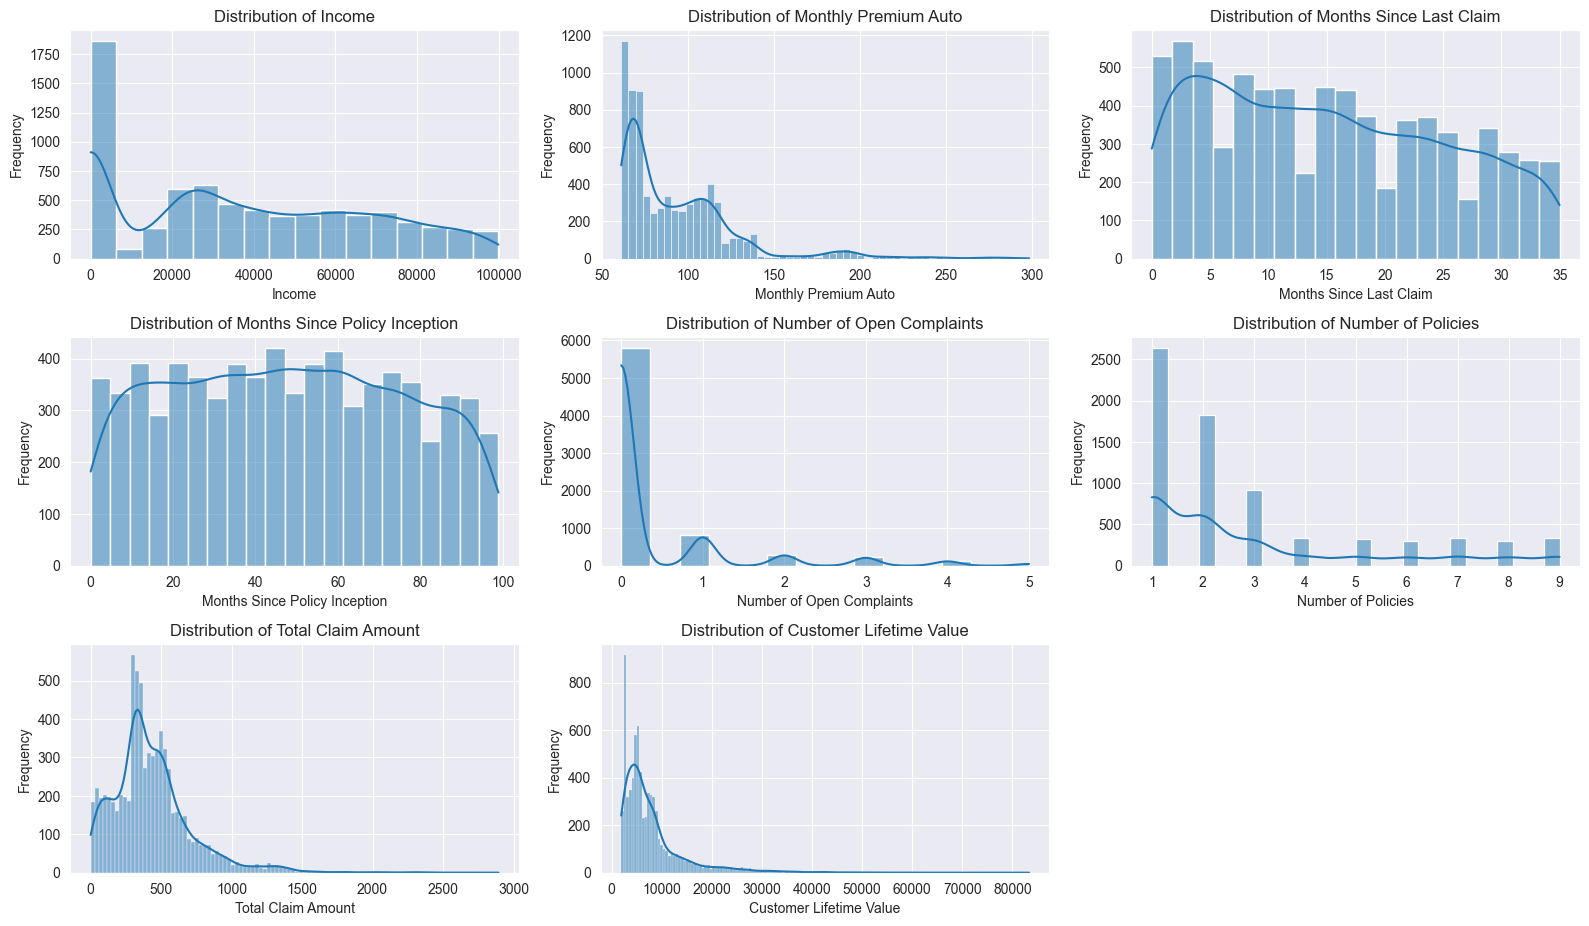

In [209]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Plot histograms for each numeric column
for i, column in enumerate(numcols, 1):
    plt.subplot(4, 3, i)  # Adjust subplot size based on the number of columns
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [211]:
#Assuming df_1 is your DataFrame and numcols are your numerical columns
skewness = df_1[numcols].skew()
kurtosis = df_1[numcols].kurt()

print("Skewness of numeric columns:")
print(skewness)

print("\nKurtosis of numeric columns:")
print(kurtosis)

Skewness of numeric columns:
Income                           0.290080
Monthly Premium Auto             2.129850
Months Since Last Claim          0.433586
Months Since Policy Inception   -0.053739
Number of Open Complaints        2.850240
Number of Policies               1.268776
Total Claim Amount               1.784692
Customer Lifetime Value          3.056497
dtype: float64

Kurtosis of numeric columns:
Income                           -1.095833
Monthly Premium Auto              6.058380
Months Since Last Claim          -0.920443
Months Since Policy Inception    -0.972280
Number of Open Complaints         8.189580
Number of Policies                0.419537
Total Claim Amount                6.399333
Customer Lifetime Value          13.886270
dtype: float64


## Insight from Skewness and Kurtosis of Numeric Columns

### **1. Income**
- **Skewness: 0.290080**
  - The income distribution is slightly **positively skewed**, indicating a mild asymmetry where some customers have higher incomes than the rest of the population.
- **Kurtosis: -1.095833**
  - The income distribution is **platykurtic**, meaning it has a flatter peak and thinner tails than a normal distribution. This suggests that the data has fewer extreme values or outliers than a normal distribution.

**Insight:** The income distribution is relatively symmetrical with few outliers, indicating a stable and broad distribution across the customer base.

---

### **2. Monthly Premium Auto**
- **Skewness: 2.129850**
  - The distribution is **highly positively skewed**, meaning that most customers pay lower premiums, but there are a few who pay significantly higher premiums.
- **Kurtosis: 6.058380**
  - The distribution is **leptokurtic**, indicating a sharp peak and heavy tails. This suggests a higher likelihood of extreme values or outliers in the monthly premium data.

**Insight:** Most customers pay lower auto premiums, but a small number pay much higher premiums, potentially due to premium coverage or additional services. The presence of outliers may indicate high-value customers or those with special insurance needs.

---

### **3. Months Since Last Claim**
- **Skewness: 0.433586**
  - The distribution is **slightly positively skewed**, indicating that most customers have made claims relatively recently, with fewer customers having gone a long time without making a claim.
- **Kurtosis: -0.920443**
  - The distribution is **platykurtic**, indicating fewer extreme values than a normal distribution. This suggests a relatively consistent pattern in the time since the last claim across customers.

**Insight:** The majority of customers have made recent claims, with a fairly consistent distribution and few outliers. This could suggest stable claim behavior across the customer base.

---

### **4. Months Since Policy Inception**
- **Skewness: -0.053739**
  - The distribution is almost **symmetrical**, indicating that the policy durations are evenly distributed across the customer base.
- **Kurtosis: -0.972280**
  - The distribution is **platykurtic**, suggesting that the data has a flat peak and thin tails, with fewer extreme values.

**Insight:** The policy inception times are evenly distributed, with most customers having policies of average duration. There are no significant outliers, indicating stable policy tenure among customers.

---

### **5. Number of Open Complaints**
- **Skewness: 2.850240**
  - The distribution is **highly positively skewed**, indicating that most customers have no open complaints, but a small number have a significantly higher number of complaints.
- **Kurtosis: 8.189580**
  - The distribution is **highly leptokurtic**, meaning there is a sharp peak and heavy tails, indicating the presence of extreme values.

**Insight:** The vast majority of customers have no complaints, but a small number of customers have a high number of complaints. This could point to specific issues affecting a subset of customers, which may require targeted intervention.

---

### **6. Number of Policies**
- **Skewness: 1.268776**
  - The distribution is **positively skewed**, indicating that most customers hold fewer policies, but a few hold a significantly larger number of policies.
- **Kurtosis: 0.419537**
  - The distribution is **close to normal** but slightly leptokurtic, suggesting a moderate concentration around the mean with some outliers.

**Insight:** Most customers hold a small number of policies, but there are some who hold significantly more, which could indicate cross-selling opportunities or a more engaged customer segment.

---

### **7. Total Claim Amount**
- **Skewness: 1.784692**
  - The distribution is **positively skewed**, indicating that while most claims are for smaller amounts, there are a few claims that are significantly higher.
- **Kurtosis: 6.399333**
  - The distribution is **leptokurtic**, suggesting a sharp peak and heavy tails. This indicates the presence of outliers or extreme claim amounts.

**Insight:** Most claims are for smaller amounts, but there are some high-value claims. These outliers could be due to significant incidents or high-value policies.

---

### **8. Customer Lifetime Value (CLV)**
- **Skewness: 3.056497**
  - The distribution is **highly positively skewed**, indicating that while most customers have a lower CLV, there are a few customers with significantly higher lifetime values.
- **Kurtosis: 13.886270**
  - The distribution is **highly leptokurtic**, suggesting a very sharp peak and heavy tails. This indicates a concentration of CLV around the mean with some extreme outliers.

**Insight:** Most customers contribute moderately to the company’s lifetime value, but there are a few customers with extremely high lifetime values. These high-value customers could be critical to the company’s profitability and may require special attention or tailored services.

---

### **Overall Summary**
- The data shows various degrees of skewness and kurtosis, indicating that some features have significant outliers and are not normally distributed.
- **Positively skewed distributions** (such as Monthly Premium Auto, Number of Open Complaints, Total Claim Amount, and CLV) suggest that most customers fall within a lower range, with a few outliers at the higher end.
- **Leptokurtic distributions** in features like Monthly Premium Auto, Number of Open Complaints, and CLV indicate that while most data points cluster around the mean, there are extreme values that could heavily influence the overall analysis.

These insights suggest a need for careful handling of outliers, possibly through transformations or segmentation, to ensure accurate analysis and modeling.


In [219]:
numerical = numcols.copy()

def calculate_outliers(df_1, feature):
    Q1 = df_1[feature].quantile(0.25)
    Q3 = df_1[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying outliers
    outliers = df_1[(df_1[feature] < lower_bound) | (df_1[feature] > upper_bound)]

    return outliers, lower_bound, upper_bound

def get_outlier_data(df_1):
    outlier_data = []

    for i in numerical:
        outliers_result, lower_bound, upper_bound = calculate_outliers(df_1, i)
        total_outlier = len(outliers_result)
        outlier_percentage = round(total_outlier / len(df_1[i]) * 100, 2)
        outlier_data.append([i, total_outlier, outlier_percentage, lower_bound, upper_bound])

    outlier_df_1 = pd.DataFrame(outlier_data, columns=[
        'Feature', 'Total Outliers', 'Percentage (%)', 'Lower Bound (IQR)', 'Upper Bound (IQR)'
    ])
    
    return outlier_df_1

# Call the function to get the outliers data
outlier_df_1 = get_outlier_data(df_1)

# Display the DataFrame
outlier_df_1

,Feature,Total Outliers,Percentage (%),Lower Bound (IQR),Upper Bound (IQR)
0,Income,0,0.00,-93696.000000,156160.000000
1,Monthly Premium Auto,318,5.20,9.000000,169.000000
2,Months Since Last Claim,0,0.00,-19.000000,45.000000
3,Months Since Policy Inception,0,0.00,-22.500000,133.500000
4,Number of Open Complaints,1255,20.53,0.000000,0.000000
5,Number of Policies,286,4.68,-3.500000,8.500000
6,Total Claim Amount,319,5.22,-138.916083,958.869650
7,Customer Lifetime Value,544,8.90,-3544.798017,16412.013682


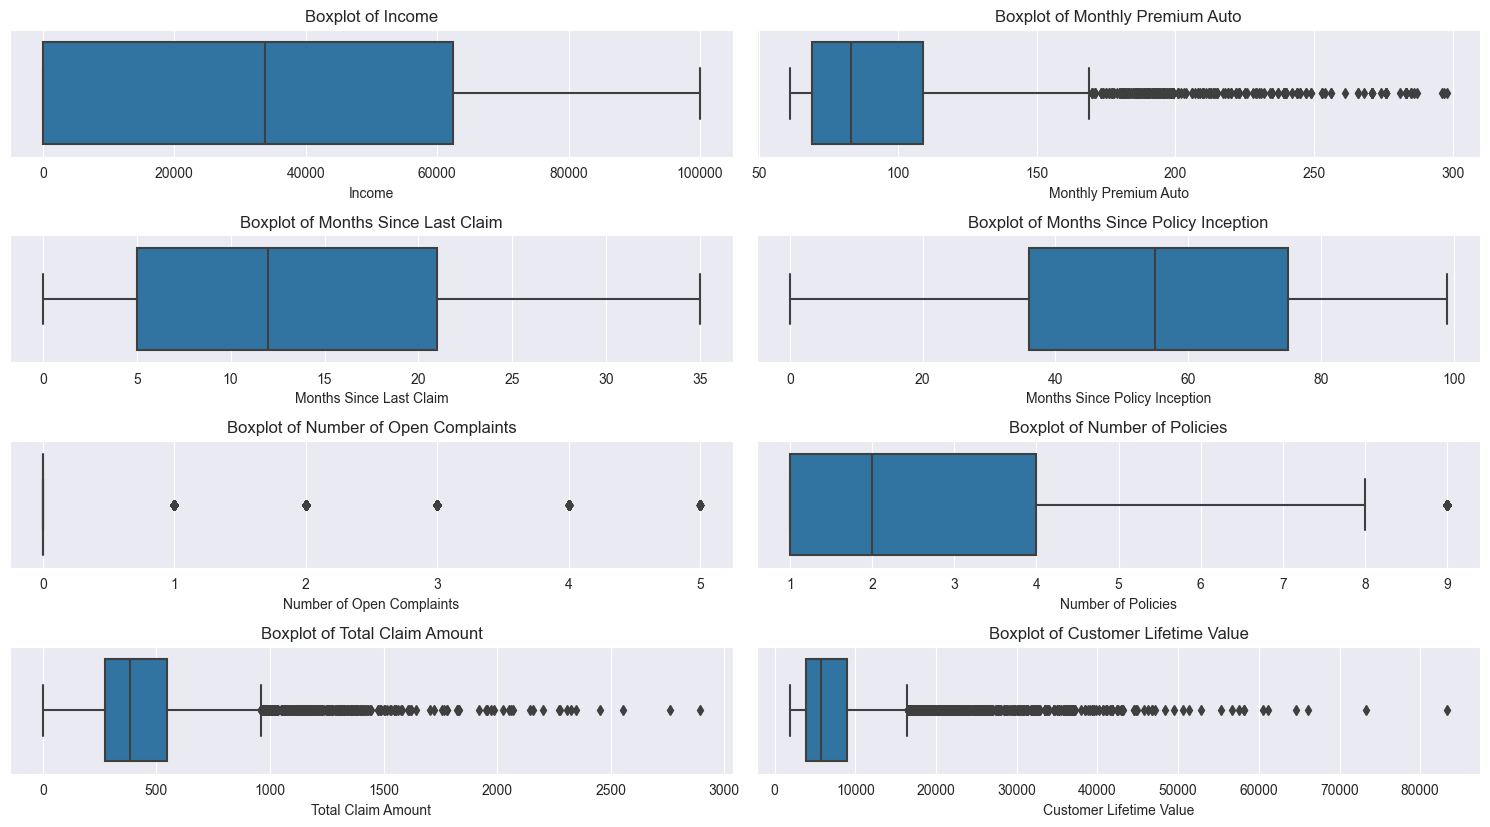

In [221]:
# Plotting the boxplots for each numerical feature to visualize outliers
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical):
    plt.subplot(len(numerical) // 2 + 1, 2, i + 1)
    sns.boxplot(data=df_1, x=feature)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

Skewness after Log Transformation: 0.5884202608690405


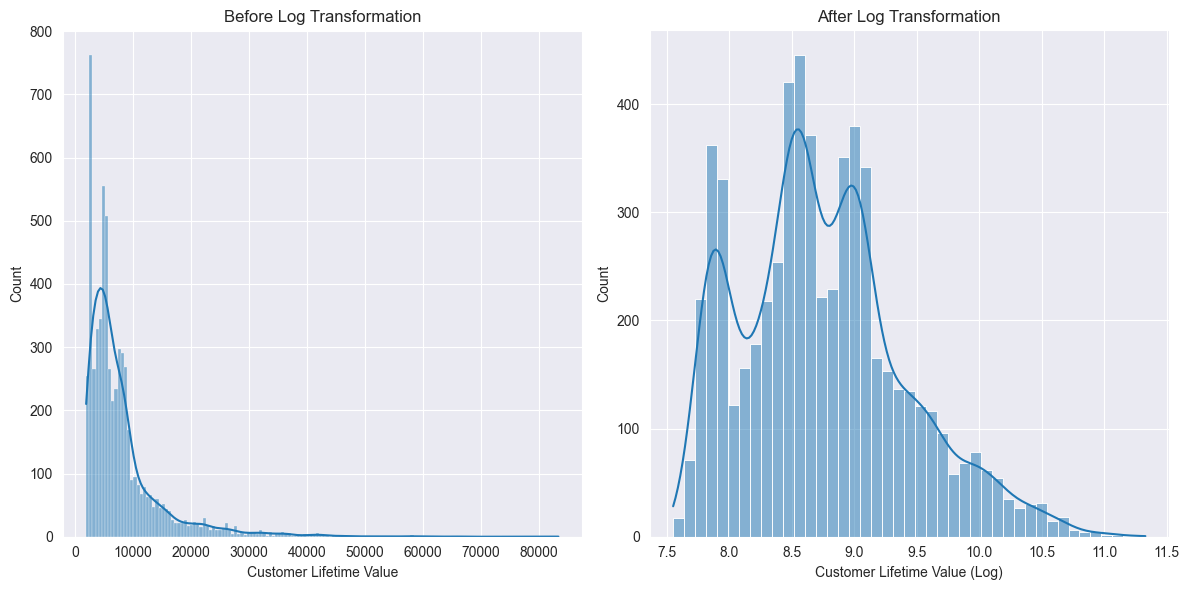

In [224]:
# Log Transformation
df_1['Customer Lifetime Value (Log)'] = np.log(df_1['Customer Lifetime Value'] + 1)

# Checking the skewness after transformation
log_skewness = df_1['Customer Lifetime Value (Log)'].skew()
print(f"Skewness after Log Transformation: {log_skewness}")

# Visualize the distribution after log transformation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_1['Customer Lifetime Value'], kde=True)
plt.title('Before Log Transformation')

plt.subplot(1, 2, 2)
sns.histplot(df_1['Customer Lifetime Value (Log)'], kde=True)
plt.title('After Log Transformation')

plt.tight_layout()
plt.show()

Total Outliers after Log Transformation: 126
Percentage of Outliers: 2.06%


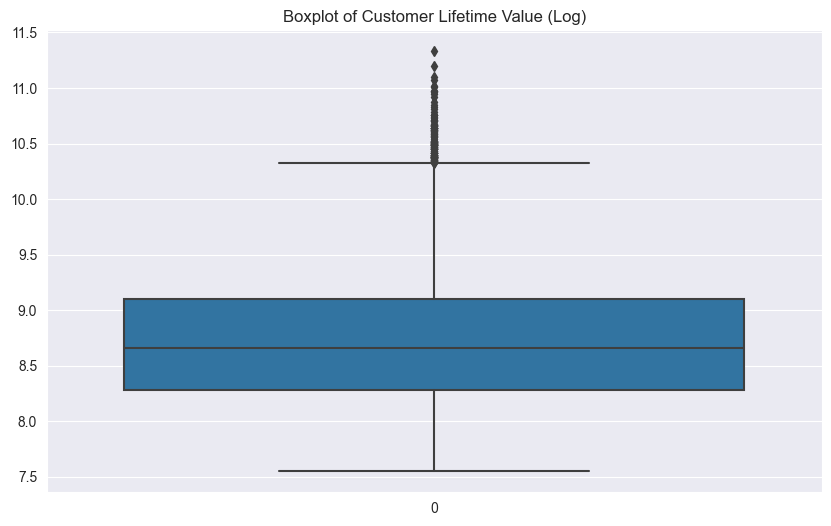

In [225]:
# Calculate IQR for the transformed CLV
Q1 = df_1['Customer Lifetime Value (Log)'].quantile(0.25)
Q3 = df_1['Customer Lifetime Value (Log)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df_1[(df_1['Customer Lifetime Value (Log)'] < lower_bound) | 
                (df_1['Customer Lifetime Value (Log)'] > upper_bound)]

total_outliers = outliers.shape[0]
outlier_percentage = (total_outliers / df_1.shape[0]) * 100

print(f"Total Outliers after Log Transformation: {total_outliers}")
print(f"Percentage of Outliers: {outlier_percentage:.2f}%")

# Visualize the boxplot to check outliers after transformation
plt.figure(figsize=(10, 6))
sns.boxplot(df_1['Customer Lifetime Value (Log)'])
plt.title('Boxplot of Customer Lifetime Value (Log)')
plt.show()

Initial Skewness: 3.056496788978642
Skewness after Log Transformation: 0.5884202608690405


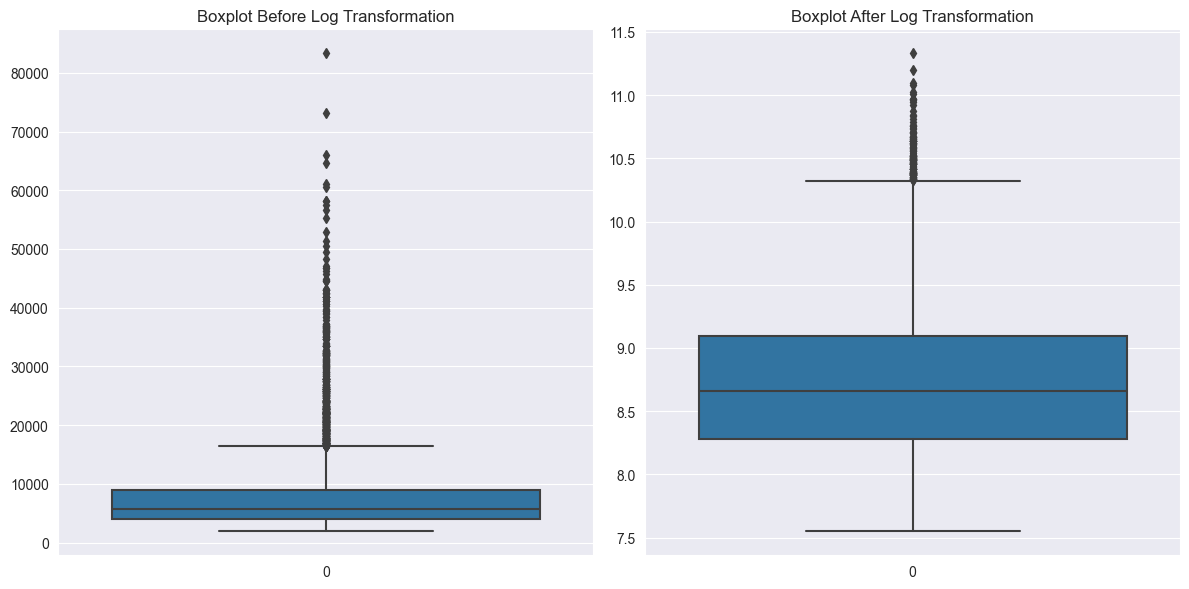

In [226]:
# Compare skewness before and after transformation
initial_skewness = df_1['Customer Lifetime Value'].skew()
log_skewness = df_1['Customer Lifetime Value (Log)'].skew()

print(f"Initial Skewness: {initial_skewness}")
print(f"Skewness after Log Transformation: {log_skewness}")

# Visualizing the comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(df_1['Customer Lifetime Value'])
plt.title('Boxplot Before Log Transformation')

plt.subplot(1, 2, 2)
sns.boxplot(df_1['Customer Lifetime Value (Log)'])
plt.title('Boxplot After Log Transformation')

plt.tight_layout()
plt.show()

Skewness after Square Root Transformation: 1.0205075929732303


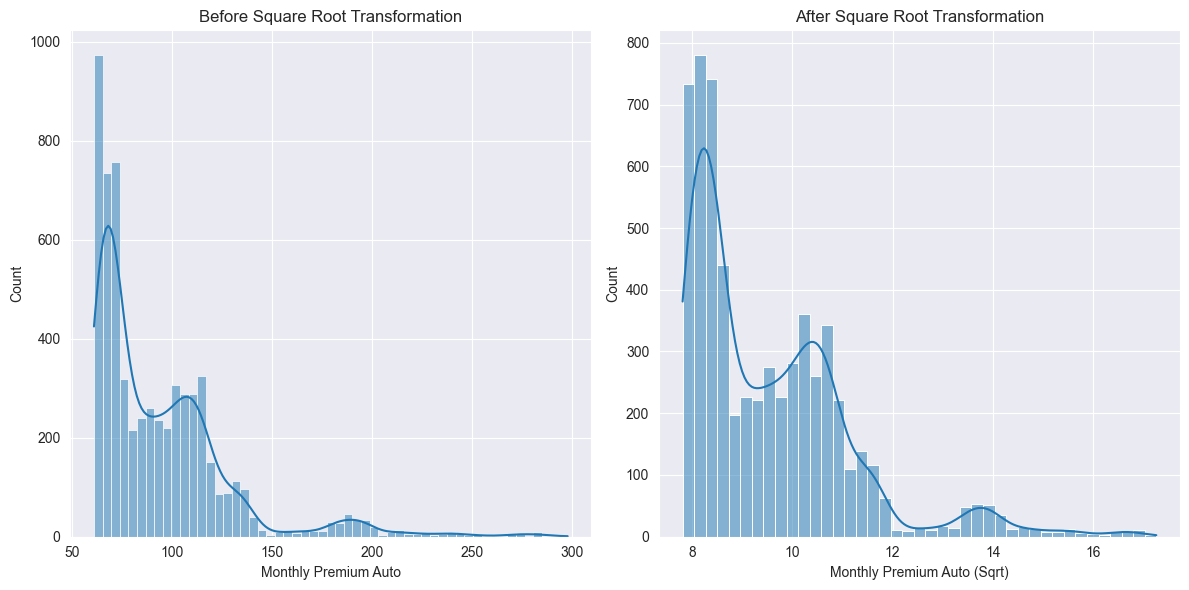

In [235]:
# Square Root Transformation
df_1['Monthly Premium Auto (Log)'] = np.log(df_1['Monthly Premium Auto'])

# Checking the skewness after transformation
log_skewness = df_1['Monthly Premium Auto (Log)'].skew()
print(f"Skewness after Square Root Transformation: {log_skewness}")

# Visualize the distribution after square root transformation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_1['Monthly Premium Auto'], kde=True)
plt.title('Before Square Root Transformation')

plt.subplot(1, 2, 2)
sns.histplot(df_1['Monthly Premium Auto (Sqrt)'], kde=True)
plt.title('After Square Root Transformation')

plt.tight_layout()
plt.show()

Total Outliers after Square Root Transformation: 84
Percentage of Outliers: 1.37%


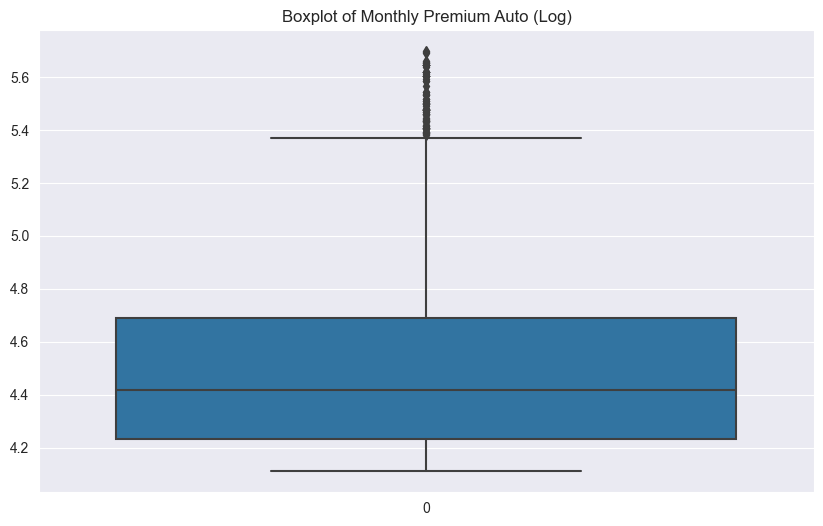

In [237]:
# Calculate IQR for the transformed Monthly Premium Auto
Q1 = df_1['Monthly Premium Auto (Log)'].quantile(0.25)
Q3 = df_1['Monthly Premium Auto (Log)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df_1[(df_1['Monthly Premium Auto (Log)'] < lower_bound) | 
                (df_1['Monthly Premium Auto (Log)'] > upper_bound)]

total_outliers = outliers.shape[0]
outlier_percentage = (total_outliers / df_1.shape[0]) * 100

print(f"Total Outliers after Square Root Transformation: {total_outliers}")
print(f"Percentage of Outliers: {outlier_percentage:.2f}%")

# Visualize the boxplot to check outliers after transformation
plt.figure(figsize=(10, 6))
sns.boxplot(df_1['Monthly Premium Auto (Log)'])
plt.title('Boxplot of Monthly Premium Auto (Log)')
plt.show()

Initial Skewness: 2.1298502195994162
Skewness after Log Transformation: 1.0205075929732303


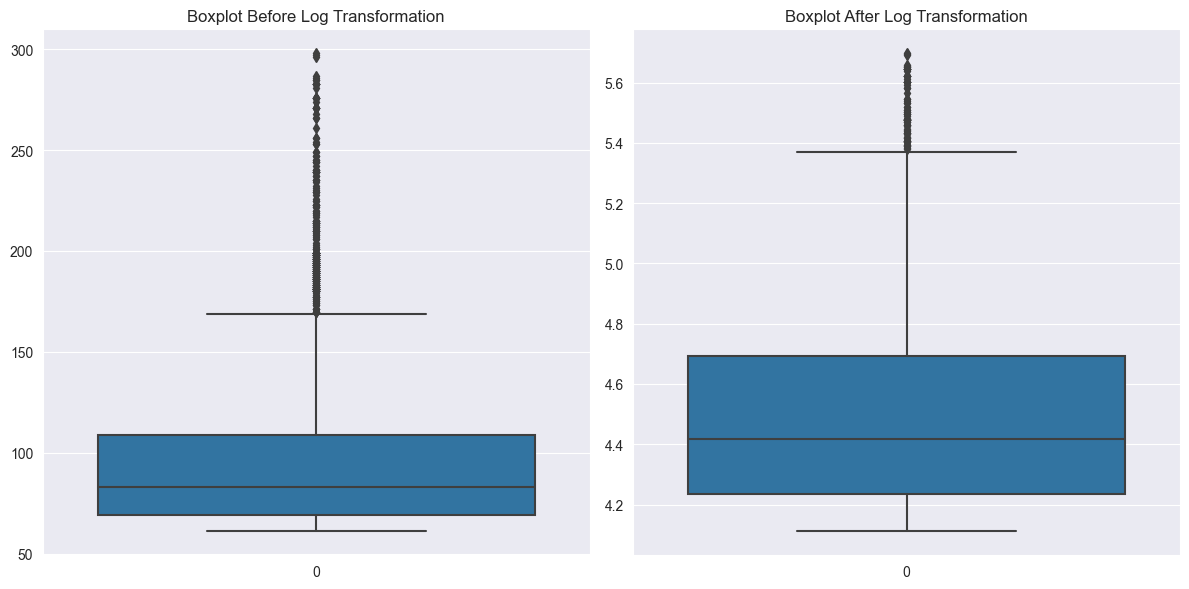

In [240]:
# Compare skewness before and after transformation
initial_skewness_premiumauto = df_1['Monthly Premium Auto'].skew()
log_skewness_premiumauto = df_1['Monthly Premium Auto (Log)'].skew()

print(f"Initial Skewness: {initial_skewness_premiumauto}")
print(f"Skewness after Log Transformation: {log_skewness_premiumauto}")

# Visualizing the comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(df_1['Monthly Premium Auto'])
plt.title('Boxplot Before Log Transformation')

plt.subplot(1, 2, 2)
sns.boxplot(df_1['Monthly Premium Auto (Log)'])
plt.title('Boxplot After Log Transformation')

plt.tight_layout()
plt.show()

Initial Skewness: 1.784691828821107
Skewness after Log Transformation: -1.7528266032648572


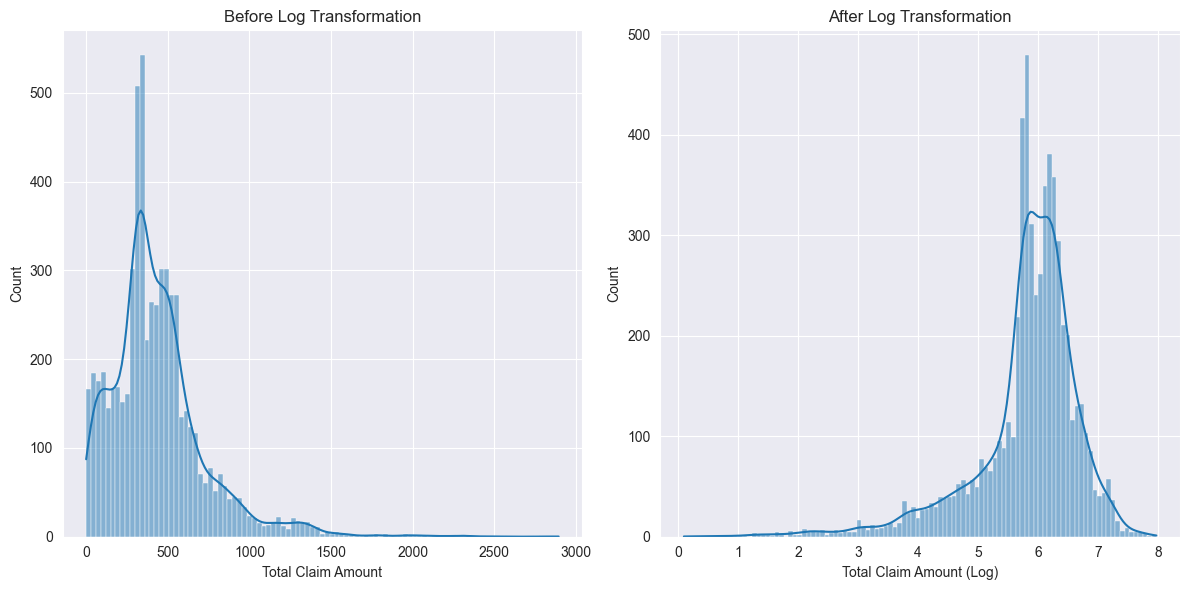

In [232]:
# Log Transformation
df_1['Total Claim Amount (Log)'] = np.log(df_1['Total Claim Amount'] + 1)

# Checking the skewness after transformation
initial_skewness_claim = df_1['Total Claim Amount'].skew()
log_skewness_claim = df_1['Total Claim Amount (Log)'].skew()
print(f"Initial Skewness: {initial_skewness_claim}")
print(f"Skewness after Log Transformation: {log_skewness_claim}")

# Visualize the distribution after log transformation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_1['Total Claim Amount'], kde=True)
plt.title('Before Log Transformation')

plt.subplot(1, 2, 2)
sns.histplot(df_1['Total Claim Amount (Log)'], kde=True)
plt.title('After Log Transformation')

plt.tight_layout()
plt.show()

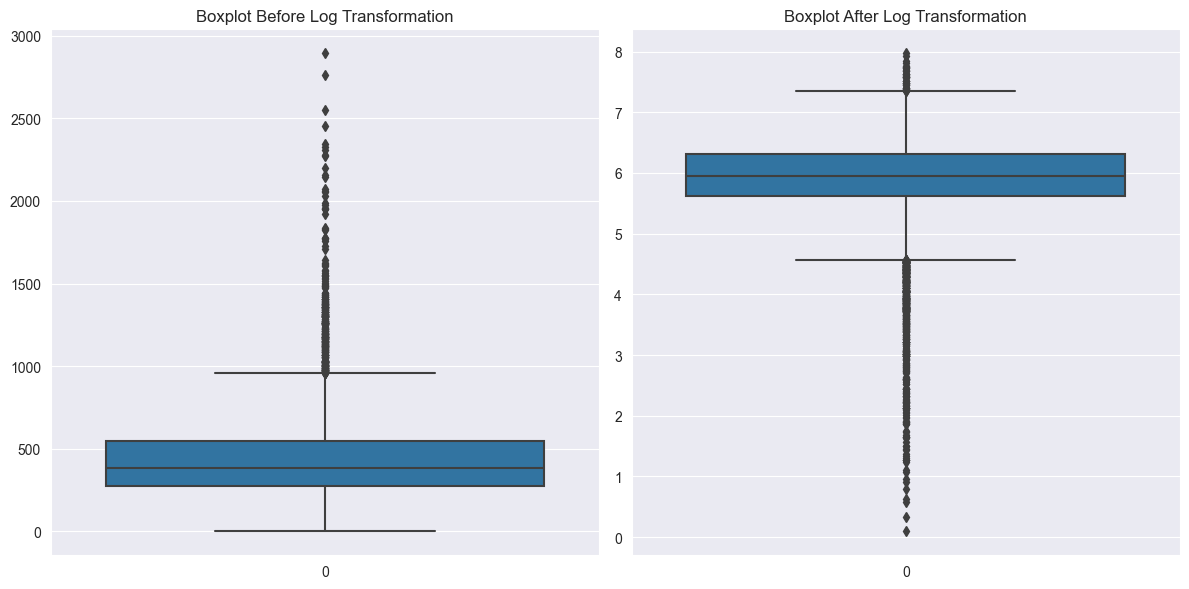

In [233]:
# Visualizing the comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(df_1['Total Claim Amount'])
plt.title('Boxplot Before Log Transformation')

plt.subplot(1, 2, 2)
sns.boxplot(df_1['Total Claim Amount (Log)'])
plt.title('Boxplot After Log Transformation')

plt.tight_layout()
plt.show()

## **Univariate Analysis**